In [26]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [27]:
N = 100
X = np.random.random(N) * 6 - 3
y = 0.5 * X - 1 + np.random.randn(N) * 0.5

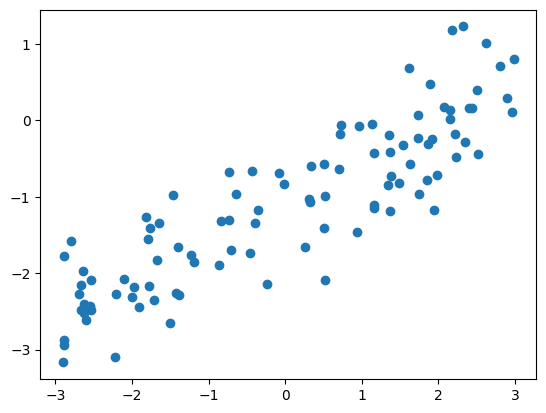

In [28]:
plt.scatter(X, y);

In [29]:
# build model
i = Input(shape=(1,))
x = Dense(1)(i)

model = Model(i, x)

In [30]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.compile(
  loss='mse',
  # optimizer='adam',
  optimizer=Adam(learning_rate=0.1),
  metrics=['mae']
)

In [32]:
r = model.fit(
  X.reshape(-1, 1), y,
  epochs=200,
  batch_size=32,
)

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 1.4434 - mae: 1.0469
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6568 - mae: 0.6881
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 0.3902 - mae: 0.4972
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2569 - mae: 0.4008
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 0.3107 - mae: 0.4434
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 0.3221 - mae: 0.4506
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2872 - mae: 0.4310
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2880 - mae: 0.4289
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2571 - mae: 0.4040
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2552 - mae: 0.4100
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2682 

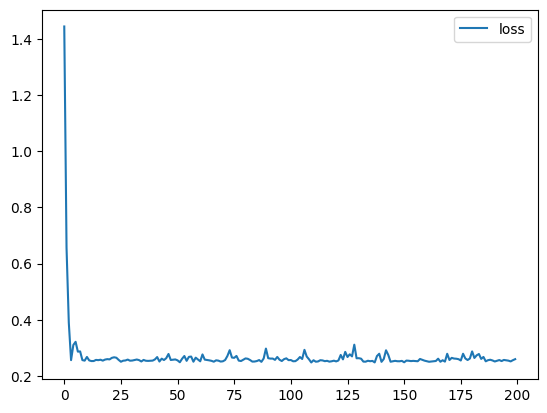

In [33]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.legend();

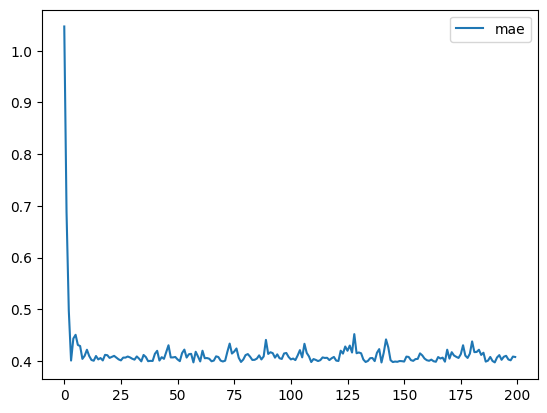

In [34]:
# Plot mae per iteration
plt.plot(r.history['mae'], label='mae')
plt.legend();

In [35]:
# Make predictions
Xtest = np.linspace(-3, 3, 20).reshape(-1, 1)
ptest = model.predict(Xtest)

1/1 [==============================] - 0s 54ms/step


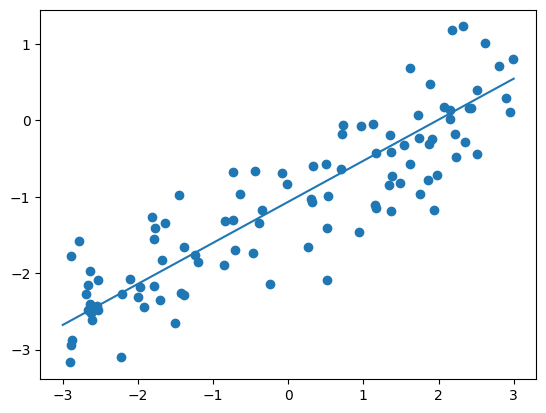

In [36]:
plt.scatter(X, y)
plt.plot(Xtest, ptest);

In [37]:
# Check the learned parameters
model.layers

In [38]:
model.layers[1].get_weights()

[array([[0.53728205]], dtype=float32), array([-1.0650398], dtype=float32)]